# EDA
- 전체적인 EDA
- 요일별 이용량에 대한 EDA


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

#실수 설정 옵션 (소수 둘째 짜리까지)
pd.options.display.float_format = '{:.2f}'.format

## 데이터셋
- 교통량통합
- 서울시 기상데이터
- 모두컴퍼니db

In [2]:
df_modu = pd.read_csv('./모두컴퍼니_기술과제/실전db.csv')
df_trafic = pd.read_excel('./모두컴퍼니_기술과제/2020교통량통합.xlsx')
df_weather = pd.read_csv('./모두컴퍼니_기술과제/서울시_기상데이터.csv',encoding = 'cp949')

In [3]:
df_modu

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


- 데이터 타입, 결측값, 요약값 확인
- 만약 날짜 데이터가 datetime이 아니라면 2개의 날짜 데이터 datetime으로 교체
- 각 피쳐마다 value_counts 확인
- 만약 결측값이 있다면 보간을 해줘야하겠다..(시계열 자료니 앞이나 뒤 자료로 보간하는게 어떨까)-> 없음
- AD1, D_TYPE에 대한 추론을 해보자
- train , test 분리


In [4]:
#df_trafic
#df_weather
df_modu.USER_ID.unique

<bound method Series.unique of 0            2858
1            5647
2           33314
3           37001
4           37819
           ...   
879266    1830551
879267    1830570
879268    1830580
879269    1830589
879270    1830598
Name: USER_ID, Length: 879271, dtype: int64>

In [5]:
#날짜 데이터 변환
df_modu.JOIN_DATE = pd.to_datetime(df_modu.JOIN_DATE)
df_modu.DATE = pd.to_datetime(df_modu.DATE)

In [6]:
df_modu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   USER_ID     879271 non-null  int64         
 1   JOIN_DATE   879271 non-null  datetime64[ns]
 2   D_TYPE      879271 non-null  object        
 3   STORE_ID    879271 non-null  int64         
 4   GOODS_TYPE  879271 non-null  object        
 5   DATE        879271 non-null  datetime64[ns]
 6   COUNT       879271 non-null  int64         
 7   AD1         879271 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 53.7+ MB


In [7]:
df_modu.describe()

,USER_ID,STORE_ID,COUNT
count,879271.00,879271.00,879271.00
mean,1206565.74,149599.96,1.03
std,420652.89,68898.04,0.51
min,224.00,4.00,1.00
25%,900576.00,92437.00,1.00
50%,1321440.00,173059.00,1.00
75%,1542416.50,220661.00,1.00
max,1830598.00,231465.00,61.00


In [8]:
df_modu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   USER_ID     879271 non-null  int64         
 1   JOIN_DATE   879271 non-null  datetime64[ns]
 2   D_TYPE      879271 non-null  object        
 3   STORE_ID    879271 non-null  int64         
 4   GOODS_TYPE  879271 non-null  object        
 5   DATE        879271 non-null  datetime64[ns]
 6   COUNT       879271 non-null  int64         
 7   AD1         879271 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 53.7+ MB


### train, test 분리

In [9]:
df_modu_train = df_modu.loc[df_modu['DATE'].between('2020-01-01', '2020-09-30')]
df_modu_test = df_modu.loc[df_modu['DATE'].between('2020.10.01', '2020.12.31')]

In [10]:
# df_modu_train.tail()
df_modu_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255692 entries, 623579 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   USER_ID     255692 non-null  int64         
 1   JOIN_DATE   255692 non-null  datetime64[ns]
 2   D_TYPE      255692 non-null  object        
 3   STORE_ID    255692 non-null  int64         
 4   GOODS_TYPE  255692 non-null  object        
 5   DATE        255692 non-null  datetime64[ns]
 6   COUNT       255692 non-null  int64         
 7   AD1         255692 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 17.6+ MB


In [26]:
df_modu_train.value_counts(['COUNT'])

COUNT
1        612896
2          9360
3           688
4           182
5           102
6            36
7            29
16           20
12           20
9            19
14           18
13           17
15           16
8            15
18           14
11           14
10           13
25           13
23           13
17           12
21           11
28           10
19            9
22            8
20            6
24            5
27            5
30            4
31            4
26            3
32            3
34            3
39            3
29            2
33            1
35            1
36            1
37            1
38            1
49            1
dtype: int64

## 요일별 이용량에 대한 EDA

In [34]:
df_modu_train['day_of_week'] = df_modu_train['DATE'].dt.weekday
df_modu_test['day_of_week'] = df_modu_test['DATE'].dt.weekday

C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df_modu_train

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,day_of_week
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2
...,...,...,...,...,...,...,...,...,...
623574,1709914,2020-09-30,BB,221022,B,2020-09-30,1,GN,2
623575,1709935,2020-09-30,AA,725,B,2020-09-30,1,MP,2
623576,1709942,2020-09-30,AA,223058,B,2020-09-30,1,BF,2
623577,1709950,2020-09-30,BB,182320,A,2020-09-30,2,JRR,2


In [36]:
weekday_train = df_modu_train.groupby(df_modu_train['day_of_week'])
weekday_test = df_modu_test.groupby(df_modu_test['day_of_week'])
print(weekday_train.size())
print(weekday_test.size())

day_of_week
0     89697
1     92933
2     93452
3     93578
4    100129
5     93663
6     60127
dtype: int64
day_of_week
0    37355
1    37748
2    38833
3    40038
4    37788
5    37817
6    26113
dtype: int64


Text(0.5, 1.0, '요일별 카운트_test')

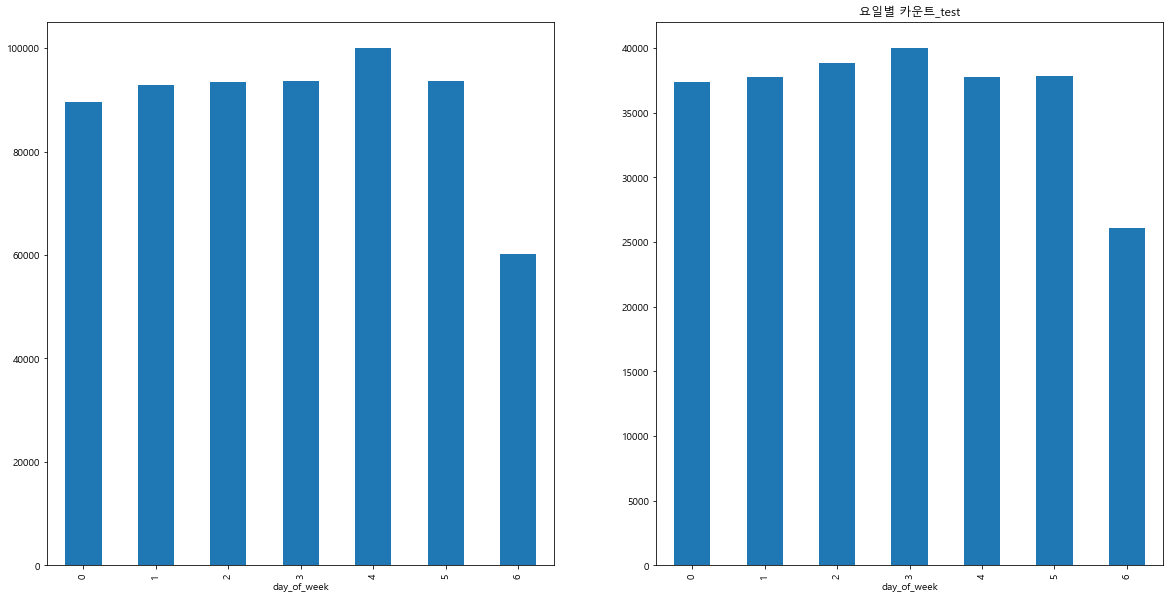

In [42]:
f, axs = plt.subplots(1,2, figsize = (20,10))

weekday_train.size().plot( kind = 'bar', ax = axs[0])

weekday_test.size().plot(kind ='bar', ax = axs[1])
plt.title('요일별 카운트_test')

- train, test 일요일 count가 다른 요일에 비해 적다
- train은 금요일, test는 목요일이 가장 많은 count 빈도를 갖는다 
- 요일별로 데이터를 구분해서 보는 것은 어떨까

In [33]:
weekday.sum()

,USER_ID,STORE_ID,COUNT
day_of_week,,,
0,104673425703,13541180032,91951
1,108569918967,13945390929,95361
2,108613911179,13957752187,95925
3,108787464546,14027538786,95993
4,116307383314,14967895586,102749
5,108098879779,13404165168,96607
6,68856703534,8521519610,61835


## 요일 별 이용자(ID) 수

In [20]:
df_modu_train.groupby(['day_of_week', 'USER_ID']).mean()

STORE_ID  COUNT
day_of_week USER_ID                 
0           232      28018.00   1.00
            1448    220607.00   1.00
            3415     74882.67   1.00
            3483    223331.00   1.00
            4375    201497.50   1.00
...                       ...    ...
6           1706521 109142.00   1.00
            1706522 190054.00   1.00
            1706548 223128.00   1.00
            1706564 109555.00   1.00
            1706738 230814.00   1.00

[277013 rows x 2 columns]

In [101]:
# for i in range(0,7):
#     print(df_modu_train[df_modu_train['day_of_week']==i].value_counts(['USER_ID']).count())
for i in range(0,7):
    print(df_modu_test[df_modu_test['day_of_week']==i].value_counts(['USER_ID']).count())

18013
18876
19903
21387
23245
24610
17417


Text(0.5, 1.0, 'count_ID_test')

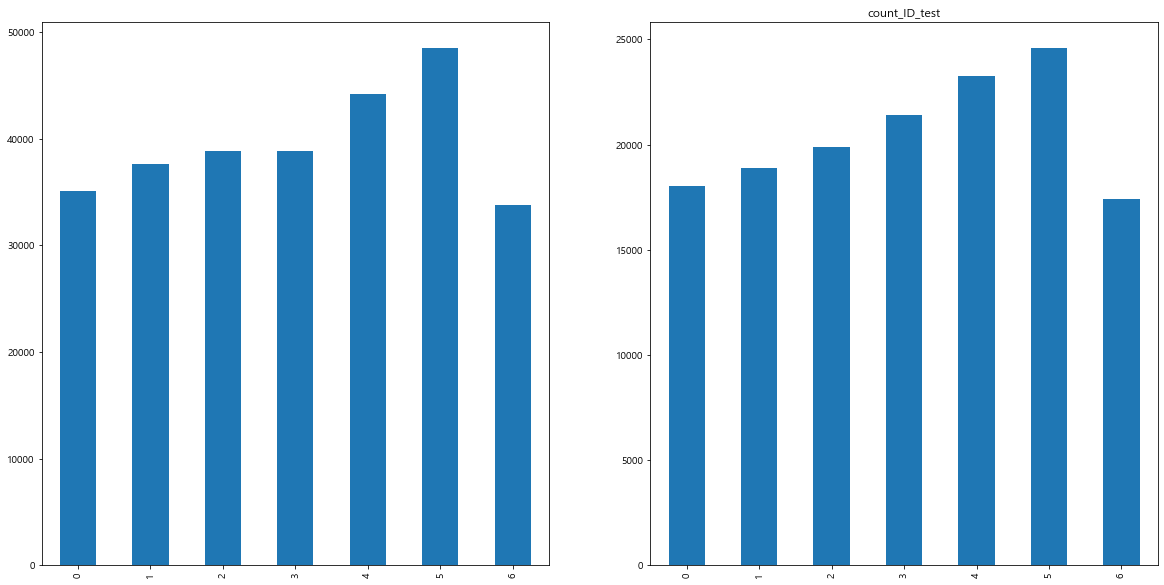

In [102]:
f, axs = plt.subplots(1,2, figsize = (20,10))
count_ID_train = pd.Series([35115,37593,38894,38859,44217,48554,33781]).plot(kind = 'bar',ax = axs[0])
count_ID_test = pd.Series([18013,18876,19903,21387,23245,24610,17417]).plot(kind = 'bar', ax = axs[1])
plt.title('count_ID_test')

- 요일별 이용자는 토요일, 금요일 순서대로 가장 많았다
- 제일 낮은 이용자 수를 기록한 요일은 둘다 일요일, 월요일 순서이다

## 요일별 goods_type, d_type, AD1

In [105]:
df_modu_train

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,day_of_week
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2
...,...,...,...,...,...,...,...,...,...
623574,1709914,2020-09-30,BB,221022,B,2020-09-30,1,GN,2
623575,1709935,2020-09-30,AA,725,B,2020-09-30,1,MP,2
623576,1709942,2020-09-30,AA,223058,B,2020-09-30,1,BF,2
623577,1709950,2020-09-30,BB,182320,A,2020-09-30,2,JRR,2


In [121]:
df_modu_train['day_of_week'].groupby(df_modu_train['D_TYPE']).size()

D_TYPE
AA    350388
BB    271869
CC      1322
Name: day_of_week, dtype: int64

In [133]:
pd.crosstab(df_modu_train['day_of_week'], 
            df_modu_train['D_TYPE'], margins=True).style.background_gradient(cmap ='Greens')

D_TYPE,AA,BB,CC,All
day_of_week,,,,
0,50593,38918,186,89697
1,52216,40524,193,92933
2,52354,40884,214,93452
3,52592,40775,211,93578
4,56264,43638,227,100129
5,53281,40212,170,93663
6,33088,26918,121,60127
All,350388,271869,1322,623579


In [135]:
#test
pd.crosstab(df_modu_test['day_of_week'], 
            df_modu_test['D_TYPE'], margins=True).style.background_gradient(cmap ='Greens')

D_TYPE,AA,BB,CC,All
day_of_week,,,,
0,20885,16438,32,37355
1,21154,16552,42,37748
2,21684,17118,31,38833
3,22408,17595,35,40038
4,20864,16889,35,37788
5,21466,16310,41,37817
6,14317,11770,26,26113
All,142778,112672,242,255692


- AA가 비율이 가장 높고 다음 BB, CC순 
- 일요일에 BB, CC보단 상대적으로 AA의 비율이 확 떨어진다
- 이것만 보고 D_TYPE이 뭔지 알기는 힘들듯!

- goods_type

In [136]:
df_modu_train['day_of_week'].groupby(df_modu_train['GOODS_TYPE']).size()

GOODS_TYPE
A    426204
B     87763
C     95588
D     14024
Name: day_of_week, dtype: int64

In [131]:
#goods_type
pd.crosstab(df_modu_train['day_of_week'], 
            df_modu_train['GOODS_TYPE'], margins=True).style.background_gradient(cmap ='Oranges')

GOODS_TYPE,A,B,C,D,All
day_of_week,,,,,
0,62301,12297,12143,2956,89697
1,62545,15489,12756,2143,92933
2,62122,15872,13229,2229,93452
3,61637,16497,13124,2320,93578
4,61850,21197,14560,2522,100129
5,69573,4693,18117,1280,93663
6,46176,1718,11659,574,60127
All,426204,87763,95588,14024,623579


In [137]:
#test_set
pd.crosstab(df_modu_test['day_of_week'], 
            df_modu_test['GOODS_TYPE'], margins=True).style.background_gradient(cmap ='Oranges')

GOODS_TYPE,A,B,C,D,All
day_of_week,,,,,
0,26798,4696,4590,1271,37355
1,26855,5255,4733,905,37748
2,27238,5714,5002,879,38833
3,27609,6296,5167,966,40038
4,24812,6650,5353,973,37788
5,29475,1525,6296,521,37817
6,20799,642,4434,238,26113
All,183586,30778,35575,5753,255692


- 다른 데이터들은 일요일 데이터만 차이가 존재했다면 goods_type 은 주말 주일로 차이를 볼수 있다
- 특히 토요일에 B,D값이 급감하고 A,C가 증가하는 형태
- goods_type은 주일, 주말을 구분하는 어떤 피쳐인지 추론해보자
- 주말권..?, 주일권..?


- AD1

In [139]:
df_modu_train['day_of_week'].groupby(df_modu_train['AD1']).size()

AD1
0       3256
ABP       46
AOI       48
BF     15202
BHW      158
       ...  
YC      1103
YD     32871
YO     26191
ZE       527
ZP        17
Name: day_of_week, Length: 78, dtype: int64

In [142]:
pd.crosstab(df_modu_train['day_of_week'], 
            df_modu_train['AD1'], margins=True).style.background_gradient(cmap ='ocean_r')

AD1,0,ABP,AOI,BF,BHW,BI,BJG,BO,BOI,BP,BUD,CAS,CCA,CD,CN,COI,CU,CY,DB,DIV,DJ,DM,DOI,DSO,EP,GAS,GAY,GB,GBC,GD,GEJ,GGC,GGM,GGY,GHN,GJ,GKP,GN,GPJ,GS,GSN,GSW,GW,GYI,IND,IYS,J,JR,JRR,MP,NO,NW,P,PJP,Q,QGI,QH,R,RRR,SB,SC,SD,SDU,SG,SJV,SOD,SOI,SP,VU,WAE,WF,WOID,WT,YC,YD,YO,ZE,ZP,All
day_of_week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,586,11,3,1689,11,3,114,5,33,8,7,4,9,1029,0,43,0,2399,25,8,251,567,3,3,0,23,77,41,181,391,6,0,21,94,83,1755,25,17466,8,3588,448,52,641,13,26,1,20513,32,12227,6281,180,0,544,9,141,2,1,93,0,67,6698,1675,3,44,4,56,2,1,0,0,65,1,16,154,4906,4137,91,3,89697
1,557,9,2,1816,16,5,159,1,36,4,5,2,7,959,1,45,0,2469,13,10,255,640,1,3,0,44,82,73,172,421,13,2,21,103,78,1824,16,17701,5,3618,452,59,750,14,28,6,21132,40,12974,6741,175,0,535,5,139,1,0,98,0,106,7171,1803,0,35,5,64,0,0,0,0,54,0,16,151,4944,4156,88,3,92933
2,577,7,7,1969,8,4,136,5,38,6,4,6,5,1008,1,49,0,2381,13,11,278,621,3,1,1,36,71,79,163,406,13,0,23,115,83,1786,19,17814,8,3616,490,74,760,16,25,1,21135,34,13065,6814,176,0,520,5,141,0,1,102,0,109,7400,1779,1,50,4,59,1,1,1,0,57,0,24,152,4887,4106,89,2,93452
3,491,10,6,1893,13,4,171,2,41,8,6,7,7,1071,4,47,0,2546,17,11,272,585,2,1,0,38,69,71,165,399,11,0,19,131,92,1791,14,17842,12,3539,495,64,767,21,30,3,20760,45,12960,6999,183,0,549,8,128,0,2,118,1,93,7653,1754,4,23,4,69,7,0,1,1,54,2,34,187,4808,4244,97,2,93578
4,461,7,8,2111,21,7,141,4,70,9,8,6,15,1103,4,49,0,2634,21,11,263,650,4,0,3,30,74,98,184,430,11,0,16,152,86,2243,14,19566,8,3352,456,76,922,21,53,0,21515,41,13760,7837,167,0,554,4,176,1,2,139,1,120,8203,1988,1,24,3,83,2,0,1,0,94,1,33,171,5305,4385,113,3,100129
5,386,0,14,2924,50,2,133,5,57,5,0,0,9,477,5,5,0,2039,4,0,1022,399,1,2,4,4,8,261,157,570,37,1,7,39,78,2154,13,21393,6,857,185,155,816,39,78,19,13710,88,14283,9464,93,1,219,8,611,3,0,97,0,58,9572,2276,2,12,6,45,43,1,0,0,139,0,28,186,5168,3097,30,3,93663
6,198,2,8,2800,39,1,101,5,19,3,0,0,12,269,4,2,1,1556,1,1,634,214,2,4,2,0,8,169,131,376,20,0,1,26,44,1761,19,12317,3,524,119,127,526,22,34,13,7462,52,10133,6299,89,0,159,8,411,1,0,49,0,20,6686,1421,0,7,3,21,21,0,0,0,105,0,21,102,2853,2066,19,1,60127
All,3256,46,48,15202,158,26,955,27,294,43,30,25,64,5916,19,240,1,16024,94,52,2975,3676,16,14,10,175,389,792,1153,2993,111,3,108,660,544,13314,120,124099,50,19094,2645,607,5182,146,274,43,126227,332,89402,50435,1063,1,3080,47,1747,8,6,696,2,573,53383,12696,11,195,29,397,76,3,3,1,568,4,172,1103,32871,26191,527,17,623579


In [143]:
#test
pd.crosstab(df_modu_test['day_of_week'], 
            df_modu_test['AD1'], margins=True).style.background_gradient(cmap ='ocean_r')

AD1,0,ABP,ADS,AOI,BF,BHW,BI,BJG,BO,BOI,BP,BUD,CAS,CCA,CD,CN,COI,CU,CVB,CY,DB,DIV,DJ,DM,DOI,DSO,DY,EP,GAS,GAY,GB,GBC,GD,GEJ,GGC,GGM,GGY,GHN,GJ,GKP,GN,GPJ,GR,GS,GSN,GSW,GW,GYI,IND,IYS,J,JR,JRR,MP,NO,P,PJP,Q,QGI,QH,R,RRR,SB,SC,SD,SDU,SG,SJV,SOD,SOI,VO,VU,WAE,WF,WH,WT,X,YC,YD,YO,ZE,ZP,All
day_of_week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,141,12,0,1,339,0,11,100,4,55,0,36,6,1,483,7,16,1,1,1047,25,3,121,202,4,1,0,0,14,36,27,128,295,20,1,37,32,39,587,26,6769,21,0,1465,187,13,225,2,15,0,8737,62,4997,2188,81,214,8,62,7,3,72,0,120,3048,778,5,24,7,210,1,0,3,2,27,5,54,0,66,2261,1699,54,4,37355
1,157,11,0,5,350,1,9,80,2,62,0,38,2,2,431,5,16,1,3,1045,10,6,101,203,6,1,0,0,24,24,31,115,271,21,1,33,49,32,621,14,6871,13,0,1467,167,16,251,3,7,0,8854,77,5153,2221,95,229,7,56,3,2,64,0,100,3029,731,1,6,3,217,0,0,2,1,23,3,85,2,85,2262,1803,56,0,37748
2,145,4,0,0,335,3,4,106,1,35,0,12,4,2,464,4,10,1,1,1076,17,5,132,249,3,1,0,1,18,31,29,129,312,23,6,37,39,24,627,25,7169,16,0,1507,160,20,255,3,6,1,9041,60,5292,2263,101,232,10,57,3,7,82,0,92,3144,806,1,16,3,222,0,0,4,0,26,3,79,2,82,2293,1788,72,0,38833
3,117,8,0,3,404,2,9,111,4,50,0,37,2,3,483,7,17,2,0,1146,20,8,132,244,3,1,1,0,18,32,39,121,345,21,5,46,35,28,674,13,7316,11,0,1502,157,17,303,5,17,1,9200,51,5601,2469,82,228,10,60,3,5,54,0,91,3427,742,1,21,4,177,2,0,5,0,32,5,71,1,68,2268,1778,60,2,40038
4,150,11,0,4,449,9,15,92,3,61,0,33,3,3,417,9,14,2,2,1091,11,4,135,239,1,3,0,1,9,27,41,143,317,27,3,40,58,20,745,10,7086,18,0,1120,133,22,322,7,28,6,7921,67,5277,2653,75,179,8,121,2,2,62,1,119,3189,777,6,16,2,182,4,0,7,0,52,4,108,0,60,2178,1715,55,2,37788
5,155,9,1,11,404,12,11,110,8,37,0,1,0,11,224,3,2,1,1,1046,1,0,346,185,1,2,0,2,2,0,82,84,274,31,3,22,16,17,807,8,8165,17,0,424,97,56,289,11,30,6,6014,81,6131,3257,35,117,7,264,1,2,37,0,158,3750,739,2,10,5,164,15,0,7,0,82,6,210,1,91,2284,1291,28,3,37817
6,104,2,0,2,552,4,1,56,9,24,1,1,0,8,117,3,5,1,0,901,0,0,189,133,0,3,0,0,0,0,59,73,182,23,0,20,12,13,563,0,5492,9,1,290,83,33,226,6,13,4,3389,41,4733,2333,38,66,0,173,0,1,22,0,102,2886,499,3,5,2,85,4,1,3,0,62,2,185,0,62,1269,906,21,2,26113
All,969,57,1,26,2833,31,60,655,31,324,1,158,17,30,2619,38,80,9,8,7352,84,26,1156,1455,18,12,1,4,85,150,308,793,1996,166,19,235,241,173,4624,96,48868,105,1,7775,984,177,1871,37,116,18,53156,439,37184,17384,507,1265,50,793,19,22,393,1,782,22473,5072,19,98,26,1257,26,1,31,3,304,28,792,6,514,14815,10980,346,13,255692


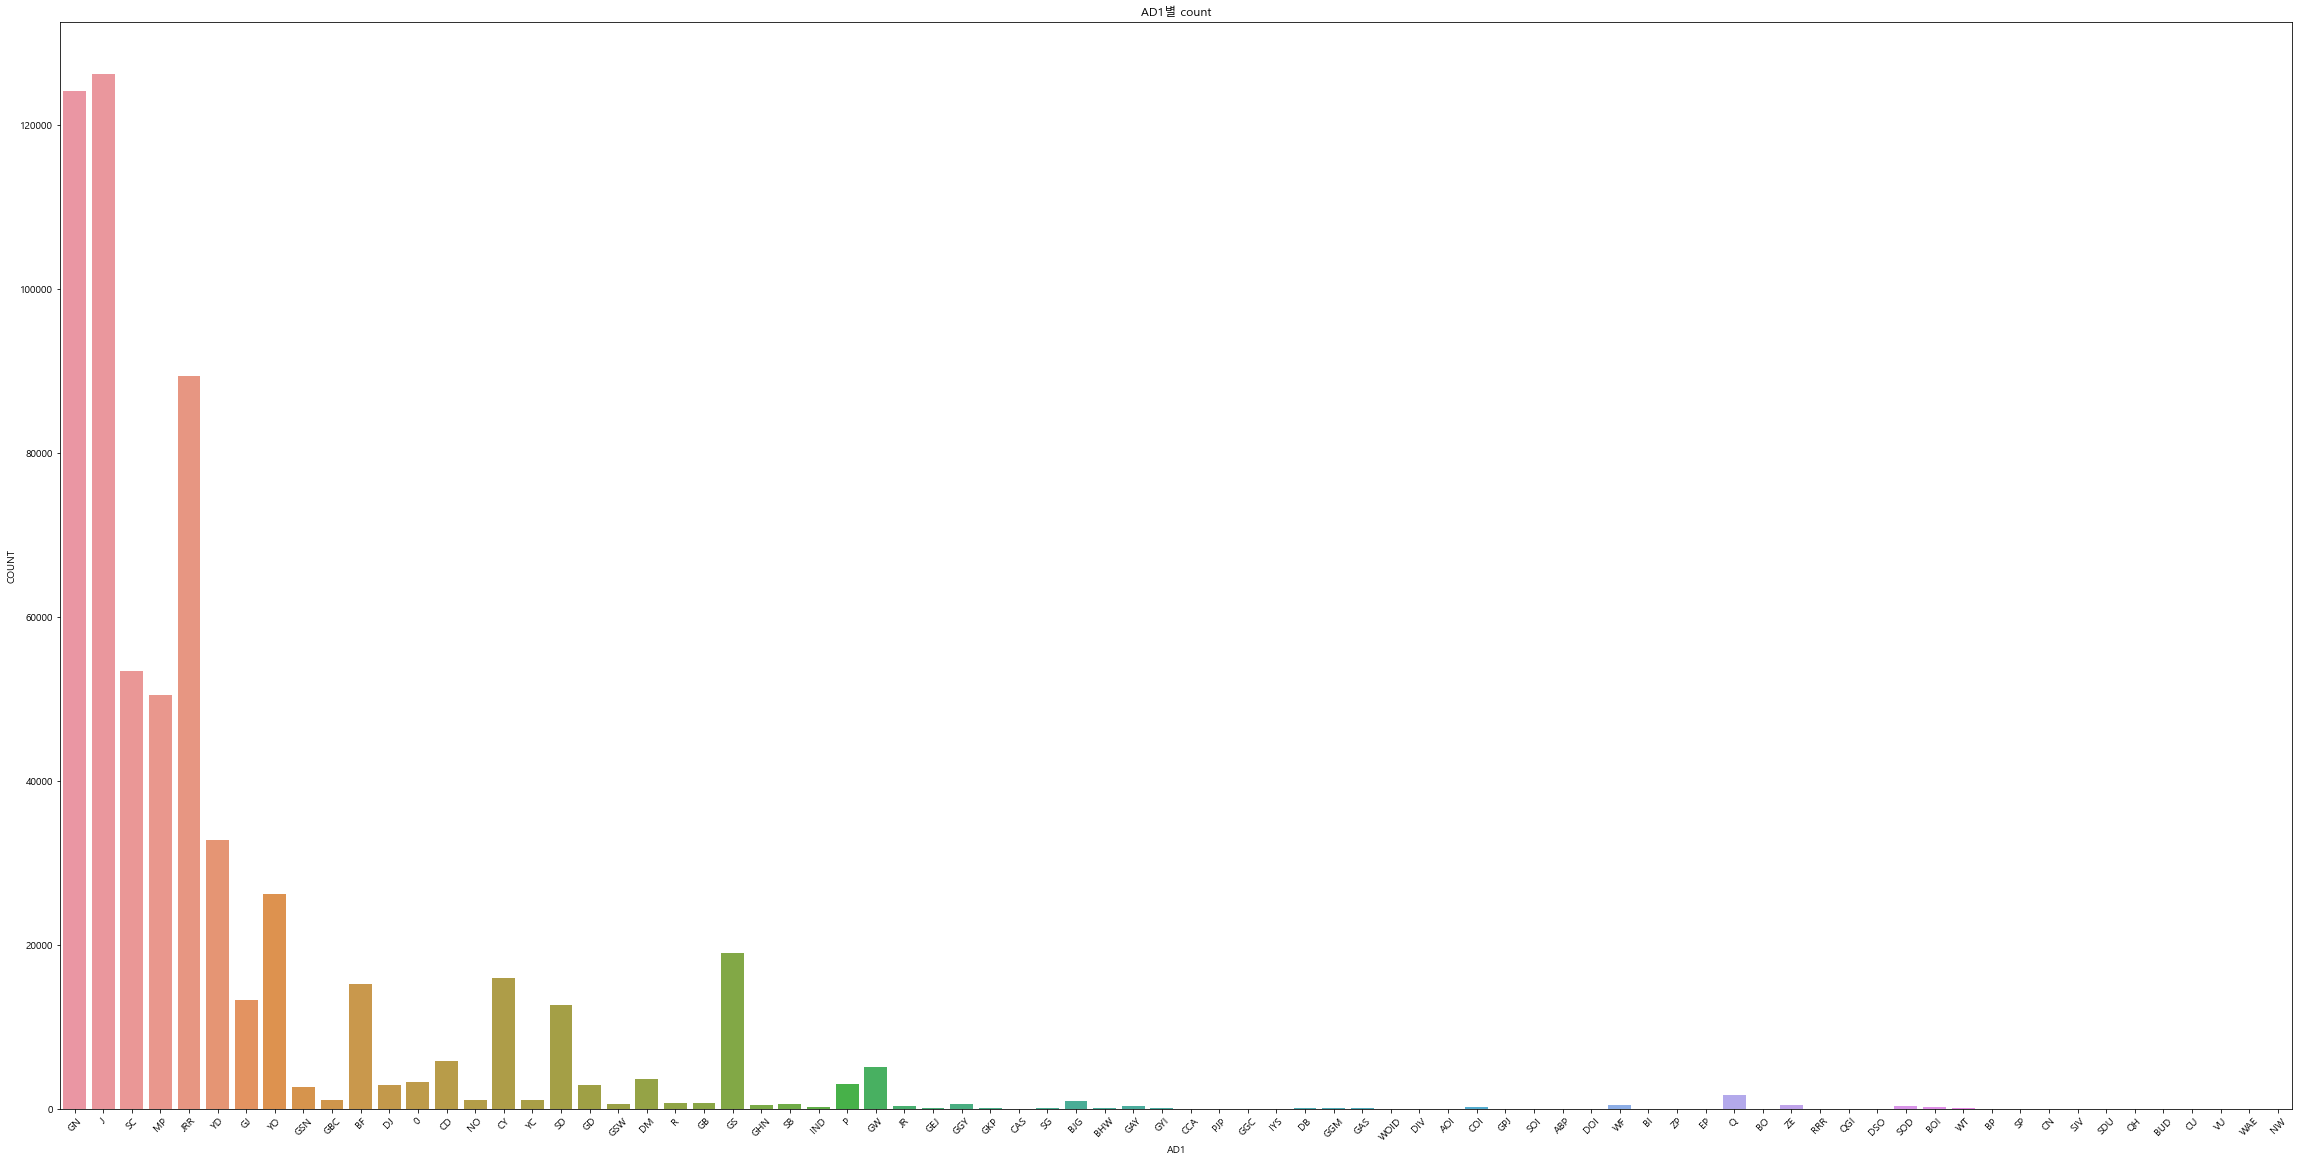

In [148]:
f, axs = plt.subplots(1,1, figsize = (40,20))
sns.barplot(data = df_modu_train, x = 'AD1',y = 'COUNT',estimator =len)
plt.xticks(rotation =45)
plt.title('AD1별 count')
plt.show()

## 05-10 EDA 결과
### 요일별 피쳐 확인
- train, test 분리
- 데이터 타입, 결측값, 요약값 확인
- 2개의 날짜 데이터 datetime으로 교체
- 각 피쳐마다 value_counts 확인
- 요일별 피쳐 특
    - count : 일요일이 상대적으로 저조하다, 나머지 요일은 서로 비슷 (극값이 없나 확인해보자), 1 비중 압도적
    - ID : 토요일, 금요일, 목요일 순서로 사람들이 많이 이용, 상대적으로 일요일, 월요일에 이용객 감소
    - D_TYPE : 상대적으로 count, id와 비슷한 양상, AA,BB,CC순으로 많다 
    - GOODS_TYPE : 다른 피쳐와 다르게 주말, 주일 양상이 다름
    - AD1 : 판단 불가..어떤 피쳐인지 아직 감이 안잡힌다